<a href="https://colab.research.google.com/github/NedKost/MS-AAI-501-Team-Project/blob/main/Neural_NetFlight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = '/Users/anovayoungers/Downloads/flight_data.csv'

pd.read_csv(file_path)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,...,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Carrier,Full-time,Part-time,Grand Total
0,2020,1,1,17,5,2020-01-17,B6,N661JB,942,PBI,...,1133.0,NaN,NaN,NaN,NaN,NaN,B6,16738.0,4860.0,21598.0
1,2020,1,1,18,6,2020-01-18,B6,N584JB,942,PBI,...,1133.0,NaN,NaN,NaN,NaN,NaN,B6,16738.0,4860.0,21598.0
2,2020,1,1,19,7,2020-01-19,B6,N662JB,942,PBI,...,1133.0,NaN,NaN,NaN,NaN,NaN,B6,16738.0,4860.0,21598.0
3,2020,1,1,20,1,2020-01-20,B6,N784JB,942,PBI,...,1133.0,NaN,NaN,NaN,NaN,NaN,B6,16738.0,4860.0,21598.0
4,2020,1,1,21,2,2020-01-21,B6,N784JB,942,PBI,...,1133.0,NaN,NaN,NaN,NaN,NaN,B6,16738.0,4860.0,21598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412871,2022,4,12,21,3,2022-12-21,NK,N623NK,913,MCI,...,1363.0,NaN,NaN,NaN,NaN,NaN,NK,11654.0,297.0,11951.0
17412872,2022,4,12,22,4,2022-12-22,NK,N623NK,913,MCI,...,1363.0,NaN,NaN,NaN,NaN,NaN,NK,11654.0,297.0,11951.0
17412873,2022,4,12,23,5,2022-12-23,NK,N692NK,913,MCI,...,1363.0,NaN,NaN,NaN,NaN,NaN,NK,11654.0,297.0,11951.0
17412874,2022,4,12,24,6,2022-12-24,NK,N622NK,913,MCI,...,1363.0,NaN,NaN,NaN,NaN,NaN,NK,11654.0,297.0,11951.0


In [ ]:
data = pd.read_csv(file_path)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17412876 entries, 0 to 17412875
Data columns (total 37 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Quarter                          int64  
 2   Month                            int64  
 3   DayofMonth                       int64  
 4   DayOfWeek                        int64  
 5   FlightDate                       object 
 6   Reporting_Airline                object 
 7   Tail_Number                      object 
 8   Flight_Number_Reporting_Airline  int64  
 9   Origin                           object 
 10  Dest                             object 
 11  DepTime                          float64
 12  DepDelay                         float64
 13  TaxiOut                          float64
 14  WheelsOff                        float64
 15  WheelsOn                         float64
 16  TaxiIn                           float64
 17  CRSArr

Check for Gaussian Distribution for normalization techniques, otherwise we would scale.

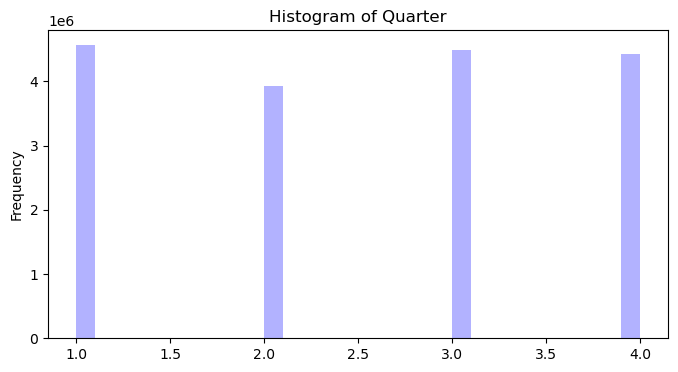

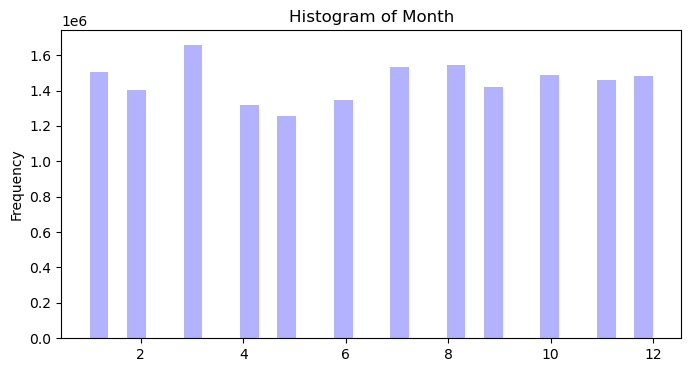

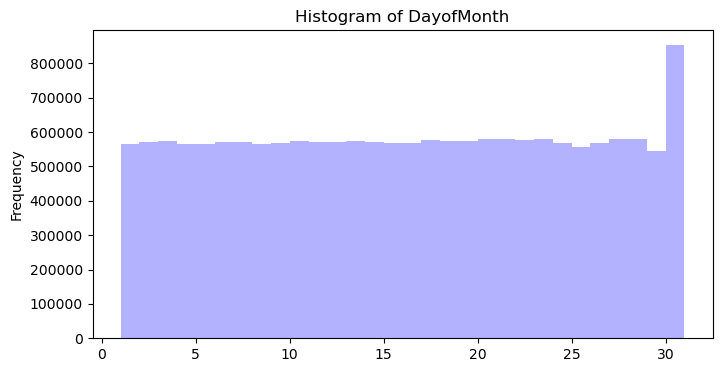

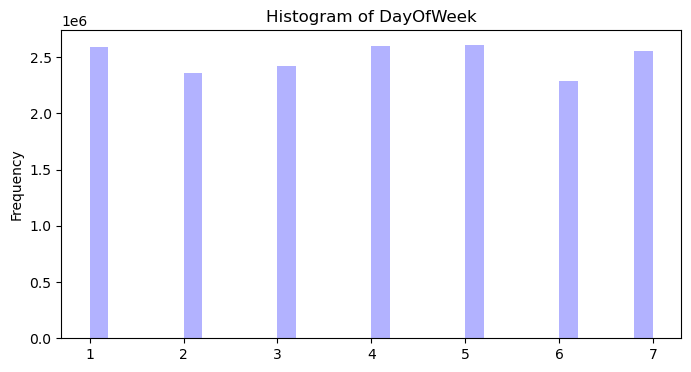

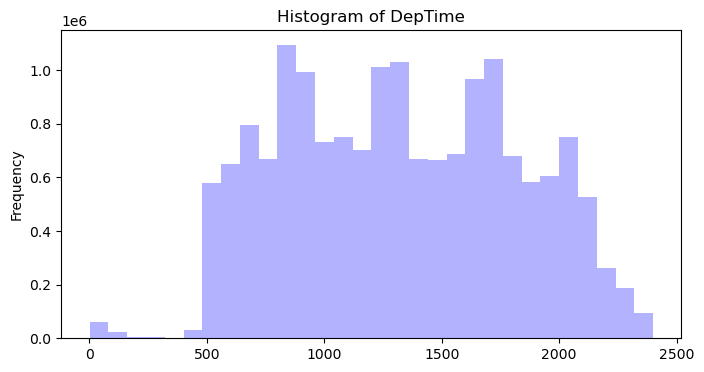

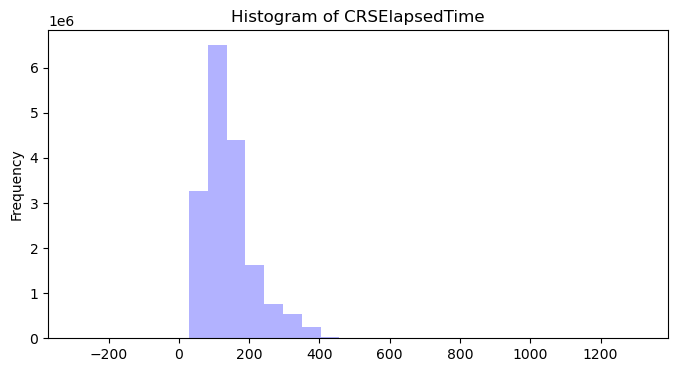

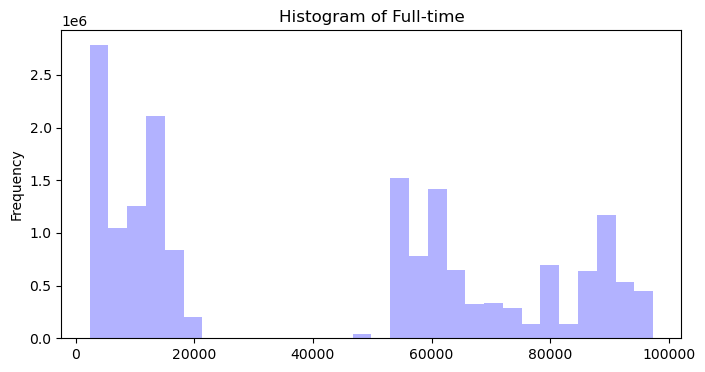

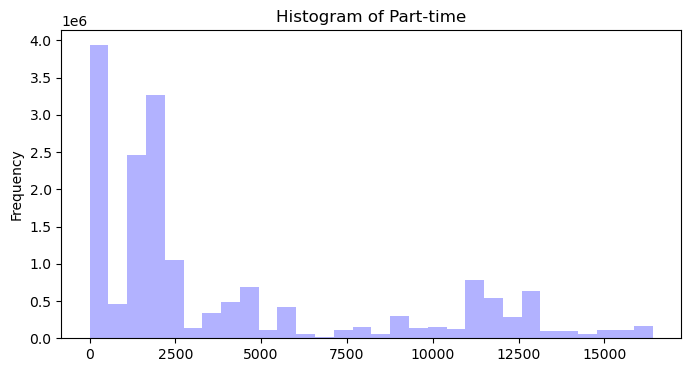

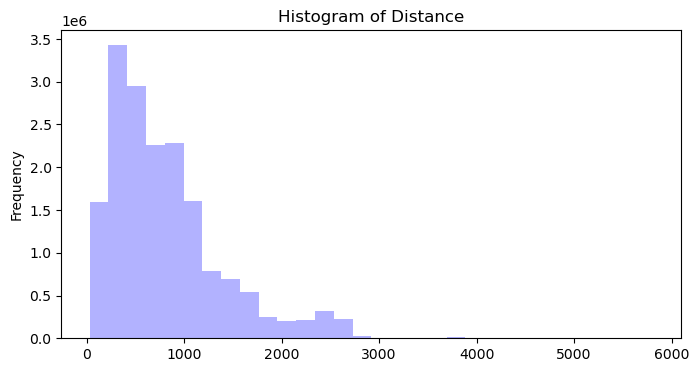

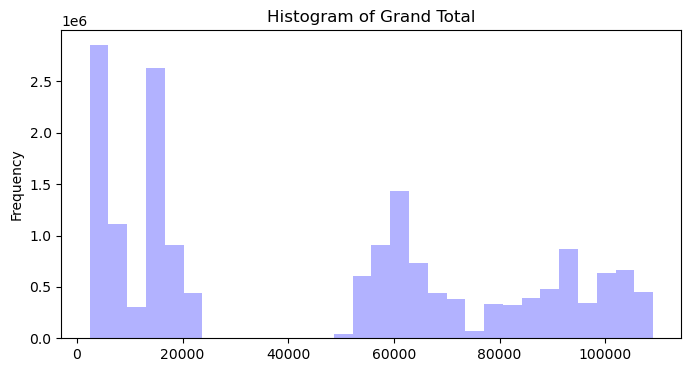

In [ ]:
import matplotlib.pyplot as plt
numerical_features = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSElapsedTime', 'Full-time', 'Part-time', 'Distance', 'Grand Total']
for features in numerical_features:
    plt.figure(figsize = (8, 4))
    plt.hist(data[features], bins = 30, color = 'blue', alpha = 0.3)
    plt.title(f'Histogram of {features}')
    plt.xlabel
    plt.ylabel('Frequency')
    plt.show()

There are essentially 0 Gaussian Distributions present, so we are going to scale.

In [ ]:
# Number of unique values in the 'Origin' column
unique_origins = data['Origin'].nunique()
print("Number of unique origin airports:", unique_origins)

# Number of unique values in the 'Dest' column
unique_destinations = data['Dest'].nunique()
print("Number of unique destination airports:", unique_destinations)

# Number of unique values in the 'Carrier' column
unique_carriers = data['Carrier'].nunique()
print("Number of unique carriers:", unique_carriers)

Number of unique origin airports: 378
Number of unique destination airports: 379
Number of unique carriers: 17


In [ ]:
# Top ten origin and destination airports
top_ten_origins = data['Origin'].value_counts().head(10).index
top_ten_destinations = data['Dest'].value_counts().head(10).index

# Categorize all other airports as 'Other' in new columns
data['Top_Origin'] = data['Origin'].apply(lambda x: x if x in top_ten_origins else 'Other')
data['Top_Dest'] = data['Dest'].apply(lambda x: x if x in top_ten_destinations else 'Other')

# Checking the distribution of the new columns
print("Top Origin Airports Distribution:\n", data['Top_Origin'].value_counts())
print("\nTop Destination Airports Distribution:\n", data['Top_Dest'].value_counts())

Top Origin Airports Distribution:
 Other    11570431
ATL        886549
DFW        782947
DEN        731279
ORD        691163
CLT        564569
LAX        489642
PHX        448145
SEA        443246
LAS        429452
MCO        375453
Name: Top_Origin, dtype: int64

Top Destination Airports Distribution:
 Other    11570832
ATL        886484
DFW        782869
DEN        731189
ORD        691113
CLT        564520
LAX        489595
PHX        448084
SEA        443211
LAS        429519
MCO        375460
Name: Top_Dest, dtype: int64


In [ ]:
# Exclude rows where 'Top_Origin' or 'Top_Dest' is 'Other'
filtered_data = data[(data['Top_Origin'] != 'Other') & (data['Top_Dest'] != 'Other')]

# Checking distribution
print("Filtered Top Origin Airports Distribution:\n", filtered_data['Top_Origin'].value_counts())
print("\nFiltered Top Destination Airports Distribution:\n", filtered_data['Top_Dest'].value_counts())

Filtered Top Origin Airports Distribution:
 LAX    145590
DEN    145335
ORD    127780
LAS    127311
ATL    127034
DFW    121895
PHX    117274
SEA    108540
MCO     86840
CLT     78146
Name: Top_Origin, dtype: int64

Filtered Top Destination Airports Distribution:
 LAX    145672
DEN    145207
ORD    127583
LAS    127282
ATL    127016
DFW    121917
PHX    117337
SEA    108586
MCO     86923
CLT     78222
Name: Top_Dest, dtype: int64


In [ ]:
features = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSElapsedTime',
            'Full-time', 'Part-time', 'Distance', 'Grand Total', 'Top_Origin', 'Top_Dest']
target = 'ArrDel15'

# Include the target variable with the features
selected_columns = features + [target]

# Filter the dataset to include only the selected features and target variable
selected_data = data[selected_columns]

# Drop rows with NaN values in any of the selected columns
selected_data_cleaned = selected_data.dropna()

# Print the shape of the cleaned dataset
print("Cleaned Dataset Shape:", selected_data_cleaned.shape)


Cleaned Dataset Shape: (16761825, 13)


In [ ]:
# One-hot encode 'Top_Origin' and 'Top_Dest'
one_hot_origin = pd.get_dummies(selected_data_cleaned['Top_Origin'], prefix='Origin')
one_hot_dest = pd.get_dummies(selected_data_cleaned['Top_Dest'], prefix='Dest')

# Concatenate the one-hot encoded columns back to the DataFrame
selected_data_encoded = pd.concat([selected_data_cleaned, one_hot_origin, one_hot_dest], axis=1)

# Drop the original 'Top_Origin' and 'Top_Dest' columns
selected_data_encoded.drop(['Top_Origin', 'Top_Dest'], axis=1, inplace=True)

# Check the first few rows of the dataset
print(selected_data_encoded.head())


   Quarter  Month  DayofMonth  DayOfWeek  DepTime  CRSElapsedTime  Full-time  \
0        1      1          17          5   1926.0           169.0    16738.0   
1        1      1          18          6   1926.0           169.0    16738.0   
2        1      1          19          7   1947.0           169.0    16738.0   
3        1      1          20          1   1933.0           169.0    16738.0   
4        1      1          21          2   1952.0           169.0    16738.0   

   Part-time  Distance  Grand Total  ...  Dest_CLT  Dest_DEN  Dest_DFW  \
0     4860.0    1133.0      21598.0  ...         0         0         0   
1     4860.0    1133.0      21598.0  ...         0         0         0   
2     4860.0    1133.0      21598.0  ...         0         0         0   
3     4860.0    1133.0      21598.0  ...         0         0         0   
4     4860.0    1133.0      21598.0  ...         0         0         0   

   Dest_LAS  Dest_LAX  Dest_MCO  Dest_ORD  Dest_Other  Dest_PHX  Dest_SEA 

In [ ]:
print("Encoded Dataset Shape:", selected_data_encoded.shape)

Encoded Dataset Shape: (16761825, 33)


In [ ]:
from sklearn.model_selection import train_test_split

X = selected_data_encoded.drop('ArrDel15', axis=1)
y = selected_data_encoded['ArrDel15']

# Splitting the dataset into train, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 40% for testing and validation
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splitting the 40% into two parts of 20% each


In [ ]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Count the number of instances for each class in 'ArrDel15'
class_counts = selected_data_encoded['ArrDel15'].value_counts()

# Print the class counts
print(class_counts)


0.0    13948089
1.0     2813736
Name: ArrDel15, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_resampled))


Class distribution after oversampling: Counter({0.0: 8368693, 1.0: 8368693})


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

n_features = X_train.shape[1]

# Building model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

Run the model

In [ ]:
# Run on training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_validation, y_validation),
    epochs=30,  # Adjust the number of epochs as needed
    batch_size=128,  # Adjust the batch size as needed
    verbose=2
)


Epoch 1/30
78572/78572 - 147s - loss: 0.4439 - accuracy: 0.8321 - val_loss: 0.4400 - val_accuracy: 0.8321 - 147s/epoch - 2ms/step
Epoch 2/30
78572/78572 - 89s - loss: 0.4407 - accuracy: 0.8321 - val_loss: 0.4381 - val_accuracy: 0.8321 - 89s/epoch - 1ms/step
Epoch 3/30
78572/78572 - 89s - loss: 0.4405 - accuracy: 0.8321 - val_loss: 0.4375 - val_accuracy: 0.8321 - 89s/epoch - 1ms/step
Epoch 4/30
78572/78572 - 88s - loss: 0.4404 - accuracy: 0.8321 - val_loss: 0.4381 - val_accuracy: 0.8321 - 88s/epoch - 1ms/step
Epoch 5/30
78572/78572 - 87s - loss: 0.4395 - accuracy: 0.8321 - val_loss: 0.4376 - val_accuracy: 0.8321 - 87s/epoch - 1ms/step
Epoch 6/30
78572/78572 - 88s - loss: 0.4392 - accuracy: 0.8321 - val_loss: 0.4368 - val_accuracy: 0.8321 - 88s/epoch - 1ms/step
Epoch 7/30
78572/78572 - 88s - loss: 0.4391 - accuracy: 0.8321 - val_loss: 0.4368 - val_accuracy: 0.8321 - 88s/epoch - 1ms/step
Epoch 8/30
78572/78572 - 88s - loss: 0.4390 - accuracy: 0.8321 - val_loss: 0.4360 - val_accuracy: 0.83

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


104762/104762 [==============================] - 942s 9ms/step - loss: 0.4340 - accuracy: 0.8323
Test Accuracy: 0.8323


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
n_features = X_train.shape[1]

# Building an alternative model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                      

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/30
78572/78572 [==============================] - 84s 1ms/step - loss: 0.4428 - accuracy: 0.8321 - val_loss: 0.4436 - val_accuracy: 0.8321
Epoch 2/30
78572/78572 [==============================] - 85s 1ms/step - loss: 0.4394 - accuracy: 0.8321 - val_loss: 0.4362 - val_accuracy: 0.8321
Epoch 3/30
78572/78572 [==============================] - 84s 1ms/step - loss: 0.4391 - accuracy: 0.8321 - val_loss: 0.4366 - val_accuracy: 0.8321
Epoch 4/30
78572/78572 [==============================] - 87s 1ms/step - loss: 0.4390 - accuracy: 0.8321 - val_loss: 0.4366 - val_accuracy: 0.8321
Epoch 5/30
78572/78572 [==============================] - 86s 1ms/step - loss: 0.4391 - accuracy: 0.8321 - val_loss: 0.4374 - val_accuracy: 0.8321


Not much difference. lets try a very complex neural net. we can see if it makes the model better or worse.

In [ ]:
# Determine the number of input features
n_features = X_train.shape[1]

# Building a very complex model architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0008)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=13,
    batch_size=128,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               8448      
                                                                 
 batch_normalization_9 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 128)              